# Insights of Oil & Gas Companies

This is Part 2 of my project for the news articles. I scraped articles for stocks of interest for the four companies (OXY, EOG, COP and PXD) from nasdaq. I preprocessed the texts data by tokenization, removing nonalphabetic words, strip white spaces, English stop words as well as lemmatization. I also show the most frequent words in the visuals of word clouds.

1. Scrape news articles
2. Preprocess the texts data, i.e., tokenization, removing English stopwords, lemmatization
3. Generate word clouds in jupyter notebook as well as Tableau

In [2]:
# Load packages
import pandas as pd
import numpy as np
from pandas_datareader.data import DataReader
from datetime import date

#visualizations
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import style
style.use('ggplot')
from mpl_finance import candlestick_ohlc
from matplotlib.dates import date2num
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 12, 10
import seaborn as sns
sns.set(context='paper',style='whitegrid',font_scale=2, rc={"lines.linewidth": 2.5})

import os 
import glob 

#web scraping
import requests
from bs4 import BeautifulSoup
from lxml import html

import warnings
warnings.filterwarnings('ignore')

#natural language processing
import nltk
from nltk.tokenize import word_tokenize
from nltk.tag import pos_tag
import spacy, gensim
import re
from collections import Counter
from wordcloud import WordCloud
from nltk.chunk import conlltags2tree, tree2conlltags
from pprint import pprint
from spacy import displacy
from sklearn.feature_extraction.text import CountVectorizer
#LDA visualzation
import pyLDAvis
import pyLDAvis.gensim

### Scrape news articles 

I want to scrape news articles from nasdaq for the companies of interest. One example url is https://www.nasdaq.com/symbol/oxy/news-headlines. I will borrow [the scraper](http://theautomatic.net/2017/08/24/scraping-articles-about-stocks/) to scrape articles for stocks of interest. 
I will uncover the most frequent words in the visuals of word clouds.

In [3]:
tickers=['OXY', 'EOG','COP','PXD']
websites=['https://www.nasdaq.com/symbol/'+t.lower()+'/news-headlines' for t in tickers]
websites

['https://www.nasdaq.com/symbol/oxy/news-headlines',
 'https://www.nasdaq.com/symbol/eog/news-headlines',
 'https://www.nasdaq.com/symbol/cop/news-headlines',
 'https://www.nasdaq.com/symbol/pxd/news-headlines']

In [4]:
'''Package what I did above into a function. Take a url of an article and returns the texts of the article'''
def scrape_news_text(news_url):
 
    news_html = requests.get(news_url).content
 
    '''convert html to BeautifulSoup object'''
    news_soup = BeautifulSoup(news_html , 'lxml')
 
    paragraphs = [par.text for par in news_soup.find_all('p')]
    news_text = ' '.join(paragraphs)

    print('test1',news_text)
    return news_text

In [5]:
#Generalized Approach
'''Generalized function to get all news-related articles from a Nasdaq webpage'''
def get_news_urls(links_site):
    '''scrape the html of the site'''
    resp = requests.get(links_site)
 
    if not resp.ok:
        return None
 
    html = resp.content
 
    '''convert html to BeautifulSoup object'''
    soup = BeautifulSoup(html , 'lxml')
 
    '''get list of all links on webpage'''
    links = soup.find_all('a')
 
    urls = [link.get('href') for link in links]
    
    for url in urls:
        if url is not None:
            print('test1...', url)
    
    urls = [url for url in urls if url is not None]

#     for url in urls:
#         if '/articles/' in url:
#             print('test1...', url)
            
    '''Filter the list of urls to just the news articles'''
    news_urls = ['https://www.nasdaq.com'+url for url in urls if '/articles/' in url]
 
    return news_urls

In [6]:
def scrape_all_articles(ticker , upper_page_limit = 5):
 
    landing_site = 'http://www.nasdaq.com/symbol/' + ticker + '/news-headlines'
 
    all_news_urls = get_news_urls(landing_site)
 
    current_urls_list = all_news_urls.copy()
 
    index = 2

    print('test2',landing_site,all_news_urls,current_urls_list)

    '''Loop through each sequential page, scraping the links from each'''
    while (current_urls_list is not None) and (current_urls_list != []) and \
        (index <= upper_page_limit):
 
        '''Construct URL for page in loop based off index'''
        current_site = landing_site + '?page=' + str(index)
        current_urls_list = get_news_urls(current_site)
 
        '''Append current webpage's list of urls to all_news_urls'''
        all_news_urls = all_news_urls + current_urls_list
 
        index = index + 1

#     print('test1',all_news_urls)

    all_news_urls = list(set(all_news_urls))

#     print('test0',all_news_urls)

    '''Now, I have a list of urls and need to actually scrape the text'''
    all_articles = [scrape_news_text(news_url) for news_url in all_news_urls]
 
    return all_articles

In [8]:
all_articles = {ticker : scrape_all_articles(ticker.lower() , 1) for ticker in tickers}

test1... #main-content
test1... /
test1... /market-activity
test1... /market-activity
test1... /market-activity
test1... /market-activity/stocks
test1... /market-activity/funds-and-etfs
test1... /market-activity/indexes
test1... /market-activity/commodities
test1... https://www.nasdaq.com/market-activity/cryptocurrency
test1... https://www.nasdaq.com/market-activity/currencies
test1... /market-activity/futures
test1... https://www.nasdaq.com/market-activity/fixed-income
test1... https://www.nasdaq.com/market-activity/quotes/real-time
test1... /market-activity/after-hours
test1... /market-activity/pre-market
test1... https://www.nasdaq.com/market-activity/quotes/Nasdaq-100-Index-Components
test1... https://www.nasdaq.com/market-activity/stocks/screener
test1... /market-activity/online-brokers
test1... https://www.nasdaq.com/glossary
test1... https://www.nasdaq.com/market-activity/fixed-income/nasdaq-sustainable-bond-network
test1... https://www.nasdaq.com/market-activity/economic-calend

test1 

<!--/*--><![CDATA[/* ><!--*/

<!--/*--><![CDATA[/* ><!--*/
#block-survival-2 {
display: none;
}

@media only screen and (min-width: 75rem) {
.page-node-type-symbol-screener .with-primary-nav .page__main {
padding-top: 140px;
}
}

.with-sub-nav .page__main {
padding-top: 120px;
}

.ui-dialog.external-link-popup { z-index: 2147483647 !important}

@media only screen and (min-width:1200px) and (max-width:1599px){.find-symbol--dark .find-symbol__form{padding:20px;min-height:140px}.find-symbol--dark .find-symbol__screener-link{top:-25px}}

.symbol-page-header__isheld{margin-top:0!important}@media only screen and (min-width:48rem){.symbol-page-header__isheld a.is-held-anchor{top:-15px;display:inline-block;position:relative}}

/*--><!]]]]><![CDATA[>*/

/*--><!]]>*/
 Top Energy Stocks XOM	-1.09% CVX	-0.77% COP	-2.03% SLB	-2.19% OXY	-0.60% Energy stocks retreated Wednesday after US President Donald Trump said Iran appears to be standing down following missile attacks overnight on two air

test1 

<!--/*--><![CDATA[/* ><!--*/

<!--/*--><![CDATA[/* ><!--*/
#block-survival-2 {
display: none;
}

@media only screen and (min-width: 75rem) {
.page-node-type-symbol-screener .with-primary-nav .page__main {
padding-top: 140px;
}
}

.with-sub-nav .page__main {
padding-top: 120px;
}

.ui-dialog.external-link-popup { z-index: 2147483647 !important}

@media only screen and (min-width:1200px) and (max-width:1599px){.find-symbol--dark .find-symbol__form{padding:20px;min-height:140px}.find-symbol--dark .find-symbol__screener-link{top:-25px}}

.symbol-page-header__isheld{margin-top:0!important}@media only screen and (min-width:48rem){.symbol-page-header__isheld a.is-held-anchor{top:-15px;display:inline-block;position:relative}}

/*--><!]]]]><![CDATA[>*/

/*--><!]]>*/
 Top Energy Stocks XOM	+1.37% CVX	+0.21% COP	+1.68% SLB	+1.17% OXY	+3.70% Energy stocks continued to add to their mid-day gains, with the NYSE Energy Sector Index climbing almost 1.6% in late trade while the shares of energy

test1 

<!--/*--><![CDATA[/* ><!--*/

<!--/*--><![CDATA[/* ><!--*/
#block-survival-2 {
display: none;
}

@media only screen and (min-width: 75rem) {
.page-node-type-symbol-screener .with-primary-nav .page__main {
padding-top: 140px;
}
}

.with-sub-nav .page__main {
padding-top: 120px;
}

.ui-dialog.external-link-popup { z-index: 2147483647 !important}

@media only screen and (min-width:1200px) and (max-width:1599px){.find-symbol--dark .find-symbol__form{padding:20px;min-height:140px}.find-symbol--dark .find-symbol__screener-link{top:-25px}}

.symbol-page-header__isheld{margin-top:0!important}@media only screen and (min-width:48rem){.symbol-page-header__isheld a.is-held-anchor{top:-15px;display:inline-block;position:relative}}

/*--><!]]]]><![CDATA[>*/

/*--><!]]>*/
 Top Energy Stocks XOM	-1.11% CVX 	-0.45% COP	-2.54% SLB 	-2.29% OXY	-1.16% Energy stocks were retreating this afternoon after US President Donald Trump said Iran appears to be standing down following its missile attacks on 

test1 

<!--/*--><![CDATA[/* ><!--*/

<!--/*--><![CDATA[/* ><!--*/
#block-survival-2 {
display: none;
}

@media only screen and (min-width: 75rem) {
.page-node-type-symbol-screener .with-primary-nav .page__main {
padding-top: 140px;
}
}

.with-sub-nav .page__main {
padding-top: 120px;
}

.ui-dialog.external-link-popup { z-index: 2147483647 !important}

@media only screen and (min-width:1200px) and (max-width:1599px){.find-symbol--dark .find-symbol__form{padding:20px;min-height:140px}.find-symbol--dark .find-symbol__screener-link{top:-25px}}

.symbol-page-header__isheld{margin-top:0!important}@media only screen and (min-width:48rem){.symbol-page-header__isheld a.is-held-anchor{top:-15px;display:inline-block;position:relative}}

/*--><!]]]]><![CDATA[>*/

/*--><!]]>*/
 ExxonMobil (NYSE: XOM) is the second-largest publicly traded oil and gas company behind the recent IPO of the Saudi Arabian Oil Company. After a rough last five years of revamping its portfolio in an effort to adjust to the

test1 

<!--/*--><![CDATA[/* ><!--*/

<!--/*--><![CDATA[/* ><!--*/
#block-survival-2 {
display: none;
}

@media only screen and (min-width: 75rem) {
.page-node-type-symbol-screener .with-primary-nav .page__main {
padding-top: 140px;
}
}

.with-sub-nav .page__main {
padding-top: 120px;
}

.ui-dialog.external-link-popup { z-index: 2147483647 !important}

@media only screen and (min-width:1200px) and (max-width:1599px){.find-symbol--dark .find-symbol__form{padding:20px;min-height:140px}.find-symbol--dark .find-symbol__screener-link{top:-25px}}

.symbol-page-header__isheld{margin-top:0!important}@media only screen and (min-width:48rem){.symbol-page-header__isheld a.is-held-anchor{top:-15px;display:inline-block;position:relative}}

/*--><!]]]]><![CDATA[>*/

/*--><!]]>*/
 Top Energy Stocks: XOM: -0.16% CVX	: -0.02% COP: +0.82% SLB: +0.81% OXY: +1.38% Top energy stocks are mostly trading higher during pre-market hours on Monday. West Texas Intermediate crude oil was ahead 69 cents to $63.74 p

test1 

<!--/*--><![CDATA[/* ><!--*/

<!--/*--><![CDATA[/* ><!--*/
#block-survival-2 {
display: none;
}

@media only screen and (min-width: 75rem) {
.page-node-type-symbol-screener .with-primary-nav .page__main {
padding-top: 140px;
}
}

.with-sub-nav .page__main {
padding-top: 120px;
}

.ui-dialog.external-link-popup { z-index: 2147483647 !important}

@media only screen and (min-width:1200px) and (max-width:1599px){.find-symbol--dark .find-symbol__form{padding:20px;min-height:140px}.find-symbol--dark .find-symbol__screener-link{top:-25px}}

.symbol-page-header__isheld{margin-top:0!important}@media only screen and (min-width:48rem){.symbol-page-header__isheld a.is-held-anchor{top:-15px;display:inline-block;position:relative}}

/*--><!]]]]><![CDATA[>*/

/*--><!]]>*/
 There's a good reason that Wall Street and investors follow Berkshire Hathaway (NYSE: BRK-A)(NYSE: BRK-B) CEO Warren Buffett like a hawk: his incredible track record. Since the mid-1950s, Buffett has managed to turn $10,000

test1 

<!--/*--><![CDATA[/* ><!--*/

<!--/*--><![CDATA[/* ><!--*/
#block-survival-2 {
display: none;
}

@media only screen and (min-width: 75rem) {
.page-node-type-symbol-screener .with-primary-nav .page__main {
padding-top: 140px;
}
}

.with-sub-nav .page__main {
padding-top: 120px;
}

.ui-dialog.external-link-popup { z-index: 2147483647 !important}

@media only screen and (min-width:1200px) and (max-width:1599px){.find-symbol--dark .find-symbol__form{padding:20px;min-height:140px}.find-symbol--dark .find-symbol__screener-link{top:-25px}}

.symbol-page-header__isheld{margin-top:0!important}@media only screen and (min-width:48rem){.symbol-page-header__isheld a.is-held-anchor{top:-15px;display:inline-block;position:relative}}

/*--><!]]]]><![CDATA[>*/

/*--><!]]>*/
 Most analysts who make stock market predictions set them and then forget them. Few will publicly go back at the end of the year and review their forecasts, unless they happened to be spot on, in which case they'll want to t

test1 

<!--/*--><![CDATA[/* ><!--*/

<!--/*--><![CDATA[/* ><!--*/
#block-survival-2 {
display: none;
}

@media only screen and (min-width: 75rem) {
.page-node-type-symbol-screener .with-primary-nav .page__main {
padding-top: 140px;
}
}

.with-sub-nav .page__main {
padding-top: 120px;
}

.ui-dialog.external-link-popup { z-index: 2147483647 !important}

@media only screen and (min-width:1200px) and (max-width:1599px){.find-symbol--dark .find-symbol__form{padding:20px;min-height:140px}.find-symbol--dark .find-symbol__screener-link{top:-25px}}

.symbol-page-header__isheld{margin-top:0!important}@media only screen and (min-width:48rem){.symbol-page-header__isheld a.is-held-anchor{top:-15px;display:inline-block;position:relative}}

/*--><!]]]]><![CDATA[>*/

/*--><!]]>*/
 Occidental Petroleum (NYSE: OXY) entered 2019 with loads of upside potential. The energy giant was coming off a transitional year during which it completed its cash-flow breakeven plan. As a result, it only needed oil to av

test1 

<!--/*--><![CDATA[/* ><!--*/

<!--/*--><![CDATA[/* ><!--*/
#block-survival-2 {
display: none;
}

@media only screen and (min-width: 75rem) {
.page-node-type-symbol-screener .with-primary-nav .page__main {
padding-top: 140px;
}
}

.with-sub-nav .page__main {
padding-top: 120px;
}

.ui-dialog.external-link-popup { z-index: 2147483647 !important}

@media only screen and (min-width:1200px) and (max-width:1599px){.find-symbol--dark .find-symbol__form{padding:20px;min-height:140px}.find-symbol--dark .find-symbol__screener-link{top:-25px}}

.symbol-page-header__isheld{margin-top:0!important}@media only screen and (min-width:48rem){.symbol-page-header__isheld a.is-held-anchor{top:-15px;display:inline-block;position:relative}}

/*--><!]]]]><![CDATA[>*/

/*--><!]]>*/
 Top Energy Stocks: XOM: +0.25% CVX: flat COP: +0.12% SLB: -4.34% OXY: +0.65% The majority of the biggest energy stocks were trading higher during pre-market hours on Monday. West Texas Intermediate crude was ahead 14 cents 

test1 

<!--/*--><![CDATA[/* ><!--*/

<!--/*--><![CDATA[/* ><!--*/
#block-survival-2 {
display: none;
}

@media only screen and (min-width: 75rem) {
.page-node-type-symbol-screener .with-primary-nav .page__main {
padding-top: 140px;
}
}

.with-sub-nav .page__main {
padding-top: 120px;
}

.ui-dialog.external-link-popup { z-index: 2147483647 !important}

@media only screen and (min-width:1200px) and (max-width:1599px){.find-symbol--dark .find-symbol__form{padding:20px;min-height:140px}.find-symbol--dark .find-symbol__screener-link{top:-25px}}

.symbol-page-header__isheld{margin-top:0!important}@media only screen and (min-width:48rem){.symbol-page-header__isheld a.is-held-anchor{top:-15px;display:inline-block;position:relative}}

/*--><!]]]]><![CDATA[>*/

/*--><!]]>*/
 Everyone knows that Ford Motor Company (NYSE: F) makes trucks, and Tesla (NASDAQ: TSLA) makes electric vehicles. But Rivian Automotive? What the heck is that? By the time 2020 is out, I suspect absolutely no one will be ask

test1 

<!--/*--><![CDATA[/* ><!--*/

<!--/*--><![CDATA[/* ><!--*/
#block-survival-2 {
display: none;
}

@media only screen and (min-width: 75rem) {
.page-node-type-symbol-screener .with-primary-nav .page__main {
padding-top: 140px;
}
}

.with-sub-nav .page__main {
padding-top: 120px;
}

.ui-dialog.external-link-popup { z-index: 2147483647 !important}

@media only screen and (min-width:1200px) and (max-width:1599px){.find-symbol--dark .find-symbol__form{padding:20px;min-height:140px}.find-symbol--dark .find-symbol__screener-link{top:-25px}}

.symbol-page-header__isheld{margin-top:0!important}@media only screen and (min-width:48rem){.symbol-page-header__isheld a.is-held-anchor{top:-15px;display:inline-block;position:relative}}

/*--><!]]]]><![CDATA[>*/

/*--><!]]>*/
 Investing in a group of quality growth stocks and sticking with them for decades can lead to life-changing wealth. An investment of just $100 per month at an annualized return of 12% over 50 years can grow to $3.9 million. 

test1 

<!--/*--><![CDATA[/* ><!--*/

<!--/*--><![CDATA[/* ><!--*/
#block-survival-2 {
display: none;
}

@media only screen and (min-width: 75rem) {
.page-node-type-symbol-screener .with-primary-nav .page__main {
padding-top: 140px;
}
}

.with-sub-nav .page__main {
padding-top: 120px;
}

.ui-dialog.external-link-popup { z-index: 2147483647 !important}

@media only screen and (min-width:1200px) and (max-width:1599px){.find-symbol--dark .find-symbol__form{padding:20px;min-height:140px}.find-symbol--dark .find-symbol__screener-link{top:-25px}}

.symbol-page-header__isheld{margin-top:0!important}@media only screen and (min-width:48rem){.symbol-page-header__isheld a.is-held-anchor{top:-15px;display:inline-block;position:relative}}

/*--><!]]]]><![CDATA[>*/

/*--><!]]>*/
 The best performing sector as of midday Monday is the Energy sector, up 1.1%.  Within the sector, EOG Resources, Inc. (Symbol: EOG) and Occidental Petroleum Corp (Symbol: OXY) are two large stocks leading the way, showing a

test1 

<!--/*--><![CDATA[/* ><!--*/

<!--/*--><![CDATA[/* ><!--*/
#block-survival-2 {
display: none;
}

@media only screen and (min-width: 75rem) {
.page-node-type-symbol-screener .with-primary-nav .page__main {
padding-top: 140px;
}
}

.with-sub-nav .page__main {
padding-top: 120px;
}

.ui-dialog.external-link-popup { z-index: 2147483647 !important}

@media only screen and (min-width:1200px) and (max-width:1599px){.find-symbol--dark .find-symbol__form{padding:20px;min-height:140px}.find-symbol--dark .find-symbol__screener-link{top:-25px}}

.symbol-page-header__isheld{margin-top:0!important}@media only screen and (min-width:48rem){.symbol-page-header__isheld a.is-held-anchor{top:-15px;display:inline-block;position:relative}}

/*--><!]]]]><![CDATA[>*/

/*--><!]]>*/
 Top Energy Stocks: XOM: -0.19% CVX: -0.05% COP: flat SLB: -0.08% OXY: +0.49% Most of the biggest energy stocks were trading lower before markets open on Tuesday. West Texas Intermediate oil, the US standard, was up 57 cents

test1 

<!--/*--><![CDATA[/* ><!--*/

<!--/*--><![CDATA[/* ><!--*/
#block-survival-2 {
display: none;
}

@media only screen and (min-width: 75rem) {
.page-node-type-symbol-screener .with-primary-nav .page__main {
padding-top: 140px;
}
}

.with-sub-nav .page__main {
padding-top: 120px;
}

.ui-dialog.external-link-popup { z-index: 2147483647 !important}

@media only screen and (min-width:1200px) and (max-width:1599px){.find-symbol--dark .find-symbol__form{padding:20px;min-height:140px}.find-symbol--dark .find-symbol__screener-link{top:-25px}}

.symbol-page-header__isheld{margin-top:0!important}@media only screen and (min-width:48rem){.symbol-page-header__isheld a.is-held-anchor{top:-15px;display:inline-block;position:relative}}

/*--><!]]]]><![CDATA[>*/

/*--><!]]>*/
 Correcting the price movement for CVX is the list of Top Energy Stocks. Top Energy Stocks: XOM: +0.43% CVX: +0.41% COP: Flat SLB: +0.87% OXY: +0.92% The West Texas Intermediate crude oil for February delivery was up 5 cents

test1 

<!--/*--><![CDATA[/* ><!--*/

<!--/*--><![CDATA[/* ><!--*/
#block-survival-2 {
display: none;
}

@media only screen and (min-width: 75rem) {
.page-node-type-symbol-screener .with-primary-nav .page__main {
padding-top: 140px;
}
}

.with-sub-nav .page__main {
padding-top: 120px;
}

.ui-dialog.external-link-popup { z-index: 2147483647 !important}

@media only screen and (min-width:1200px) and (max-width:1599px){.find-symbol--dark .find-symbol__form{padding:20px;min-height:140px}.find-symbol--dark .find-symbol__screener-link{top:-25px}}

.symbol-page-header__isheld{margin-top:0!important}@media only screen and (min-width:48rem){.symbol-page-header__isheld a.is-held-anchor{top:-15px;display:inline-block;position:relative}}

/*--><!]]]]><![CDATA[>*/

/*--><!]]>*/
 Berkshire Hathaway (NYSE: BRK-A) (NYSE: BRK-B) CEO Warren Buffett is one of the most-followed and successful investors on the planet. Even though the "Oracle of Omaha" only managed to keep pace with the return of the benchm

test1... #main-content
test1... /
test1... /market-activity
test1... /market-activity
test1... /market-activity
test1... /market-activity/stocks
test1... /market-activity/funds-and-etfs
test1... /market-activity/indexes
test1... /market-activity/commodities
test1... https://www.nasdaq.com/market-activity/cryptocurrency
test1... https://www.nasdaq.com/market-activity/currencies
test1... /market-activity/futures
test1... https://www.nasdaq.com/market-activity/fixed-income
test1... https://www.nasdaq.com/market-activity/quotes/real-time
test1... /market-activity/after-hours
test1... /market-activity/pre-market
test1... https://www.nasdaq.com/market-activity/quotes/Nasdaq-100-Index-Components
test1... https://www.nasdaq.com/market-activity/stocks/screener
test1... /market-activity/online-brokers
test1... https://www.nasdaq.com/glossary
test1... https://www.nasdaq.com/market-activity/fixed-income/nasdaq-sustainable-bond-network
test1... https://www.nasdaq.com/market-activity/economic-calend

test1 

<!--/*--><![CDATA[/* ><!--*/

<!--/*--><![CDATA[/* ><!--*/
#block-survival-2 {
display: none;
}

@media only screen and (min-width: 75rem) {
.page-node-type-symbol-screener .with-primary-nav .page__main {
padding-top: 140px;
}
}

.with-sub-nav .page__main {
padding-top: 120px;
}

.ui-dialog.external-link-popup { z-index: 2147483647 !important}

@media only screen and (min-width:1200px) and (max-width:1599px){.find-symbol--dark .find-symbol__form{padding:20px;min-height:140px}.find-symbol--dark .find-symbol__screener-link{top:-25px}}

.symbol-page-header__isheld{margin-top:0!important}@media only screen and (min-width:48rem){.symbol-page-header__isheld a.is-held-anchor{top:-15px;display:inline-block;position:relative}}

/*--><!]]]]><![CDATA[>*/

/*--><!]]>*/
 MAA (MAA) approved a quarterly dividend payment of $1.00 per share of common stock to be paid on January 31, 2020 to shareholders of record on January 15, 2020, representing a 4.2% increase over the prior rate. 
 
 Danaher 

test1 

<!--/*--><![CDATA[/* ><!--*/

<!--/*--><![CDATA[/* ><!--*/
#block-survival-2 {
display: none;
}

@media only screen and (min-width: 75rem) {
.page-node-type-symbol-screener .with-primary-nav .page__main {
padding-top: 140px;
}
}

.with-sub-nav .page__main {
padding-top: 120px;
}

.ui-dialog.external-link-popup { z-index: 2147483647 !important}

@media only screen and (min-width:1200px) and (max-width:1599px){.find-symbol--dark .find-symbol__form{padding:20px;min-height:140px}.find-symbol--dark .find-symbol__screener-link{top:-25px}}

.symbol-page-header__isheld{margin-top:0!important}@media only screen and (min-width:48rem){.symbol-page-header__isheld a.is-held-anchor{top:-15px;display:inline-block;position:relative}}

/*--><!]]]]><![CDATA[>*/

/*--><!]]>*/
 Last year was another lackluster one for investors in the energy patch. The average energy stock in the S&P 500 rose only about 5% on the year, which vastly trailed the overall index's 28.9% surge. The energy sector's under

test1 

<!--/*--><![CDATA[/* ><!--*/

<!--/*--><![CDATA[/* ><!--*/
#block-survival-2 {
display: none;
}

@media only screen and (min-width: 75rem) {
.page-node-type-symbol-screener .with-primary-nav .page__main {
padding-top: 140px;
}
}

.with-sub-nav .page__main {
padding-top: 120px;
}

.ui-dialog.external-link-popup { z-index: 2147483647 !important}

@media only screen and (min-width:1200px) and (max-width:1599px){.find-symbol--dark .find-symbol__form{padding:20px;min-height:140px}.find-symbol--dark .find-symbol__screener-link{top:-25px}}

.symbol-page-header__isheld{margin-top:0!important}@media only screen and (min-width:48rem){.symbol-page-header__isheld a.is-held-anchor{top:-15px;display:inline-block;position:relative}}

/*--><!]]]]><![CDATA[>*/

/*--><!]]>*/
 Among the underlying components of the S&P 500 index, we saw noteworthy options trading volume today in EOG Resources, Inc. (Symbol: EOG), where a total of 19,474 contracts have traded so far, representing approximately 1.9

test1 

<!--/*--><![CDATA[/* ><!--*/

<!--/*--><![CDATA[/* ><!--*/
#block-survival-2 {
display: none;
}

@media only screen and (min-width: 75rem) {
.page-node-type-symbol-screener .with-primary-nav .page__main {
padding-top: 140px;
}
}

.with-sub-nav .page__main {
padding-top: 120px;
}

.ui-dialog.external-link-popup { z-index: 2147483647 !important}

@media only screen and (min-width:1200px) and (max-width:1599px){.find-symbol--dark .find-symbol__form{padding:20px;min-height:140px}.find-symbol--dark .find-symbol__screener-link{top:-25px}}

.symbol-page-header__isheld{margin-top:0!important}@media only screen and (min-width:48rem){.symbol-page-header__isheld a.is-held-anchor{top:-15px;display:inline-block;position:relative}}

/*--><!]]]]><![CDATA[>*/

/*--><!]]>*/
 Looking today at week-over-week shares outstanding changes among the universe of ETFs covered at ETF Channel, one standout is the The Energy Select Sector SPDR— Fund (Symbol: XLE) where we have detected an approximate $368.

test1 

<!--/*--><![CDATA[/* ><!--*/

<!--/*--><![CDATA[/* ><!--*/
#block-survival-2 {
display: none;
}

@media only screen and (min-width: 75rem) {
.page-node-type-symbol-screener .with-primary-nav .page__main {
padding-top: 140px;
}
}

.with-sub-nav .page__main {
padding-top: 120px;
}

.ui-dialog.external-link-popup { z-index: 2147483647 !important}

@media only screen and (min-width:1200px) and (max-width:1599px){.find-symbol--dark .find-symbol__form{padding:20px;min-height:140px}.find-symbol--dark .find-symbol__screener-link{top:-25px}}

.symbol-page-header__isheld{margin-top:0!important}@media only screen and (min-width:48rem){.symbol-page-header__isheld a.is-held-anchor{top:-15px;display:inline-block;position:relative}}

/*--><!]]]]><![CDATA[>*/

/*--><!]]>*/
 The best performing sector as of midday Tuesday is the Energy sector, up 0.6%.  Within the sector, Cimarex Energy Co (Symbol: XEC) and EOG Resources, Inc. (Symbol: EOG) are two of the day's stand-outs, showing a gain of 3.2

test1 

<!--/*--><![CDATA[/* ><!--*/

<!--/*--><![CDATA[/* ><!--*/
#block-survival-2 {
display: none;
}

@media only screen and (min-width: 75rem) {
.page-node-type-symbol-screener .with-primary-nav .page__main {
padding-top: 140px;
}
}

.with-sub-nav .page__main {
padding-top: 120px;
}

.ui-dialog.external-link-popup { z-index: 2147483647 !important}

@media only screen and (min-width:1200px) and (max-width:1599px){.find-symbol--dark .find-symbol__form{padding:20px;min-height:140px}.find-symbol--dark .find-symbol__screener-link{top:-25px}}

.symbol-page-header__isheld{margin-top:0!important}@media only screen and (min-width:48rem){.symbol-page-header__isheld a.is-held-anchor{top:-15px;display:inline-block;position:relative}}

/*--><!]]]]><![CDATA[>*/

/*--><!]]>*/
 Looking at the sectors faring worst as of midday Thursday, shares of Energy companies are underperforming other sectors, showing a 0.6% loss.  Within the sector, Cimarex Energy Co (Symbol: XEC) and EOG Resources, Inc. (Symb

test1 

<!--/*--><![CDATA[/* ><!--*/

<!--/*--><![CDATA[/* ><!--*/
#block-survival-2 {
display: none;
}

@media only screen and (min-width: 75rem) {
.page-node-type-symbol-screener .with-primary-nav .page__main {
padding-top: 140px;
}
}

.with-sub-nav .page__main {
padding-top: 120px;
}

.ui-dialog.external-link-popup { z-index: 2147483647 !important}

@media only screen and (min-width:1200px) and (max-width:1599px){.find-symbol--dark .find-symbol__form{padding:20px;min-height:140px}.find-symbol--dark .find-symbol__screener-link{top:-25px}}

.symbol-page-header__isheld{margin-top:0!important}@media only screen and (min-width:48rem){.symbol-page-header__isheld a.is-held-anchor{top:-15px;display:inline-block;position:relative}}

/*--><!]]]]><![CDATA[>*/

/*--><!]]>*/
 In afternoon trading on Wednesday, Energy stocks are the best performing sector, up 0.8%.  Within that group, EOG Resources, Inc. (Symbol: EOG) and Devon Energy Corp. (Symbol: DVN) are two large stocks leading the way, show

test1 

<!--/*--><![CDATA[/* ><!--*/

<!--/*--><![CDATA[/* ><!--*/
#block-survival-2 {
display: none;
}

@media only screen and (min-width: 75rem) {
.page-node-type-symbol-screener .with-primary-nav .page__main {
padding-top: 140px;
}
}

.with-sub-nav .page__main {
padding-top: 120px;
}

.ui-dialog.external-link-popup { z-index: 2147483647 !important}

@media only screen and (min-width:1200px) and (max-width:1599px){.find-symbol--dark .find-symbol__form{padding:20px;min-height:140px}.find-symbol--dark .find-symbol__screener-link{top:-25px}}

.symbol-page-header__isheld{margin-top:0!important}@media only screen and (min-width:48rem){.symbol-page-header__isheld a.is-held-anchor{top:-15px;display:inline-block;position:relative}}

/*--><!]]]]><![CDATA[>*/

/*--><!]]>*/
 EOG Resources (NYSE:EOG) is an oil exploration and production company based out of Houston, Texas. It competes with other E&P companies including ConocoPhillips, Chesapeake Energy and Occidental Petroleum. EOG has one of th

test1 

<!--/*--><![CDATA[/* ><!--*/

<!--/*--><![CDATA[/* ><!--*/
#block-survival-2 {
display: none;
}

@media only screen and (min-width: 75rem) {
.page-node-type-symbol-screener .with-primary-nav .page__main {
padding-top: 140px;
}
}

.with-sub-nav .page__main {
padding-top: 120px;
}

.ui-dialog.external-link-popup { z-index: 2147483647 !important}

@media only screen and (min-width:1200px) and (max-width:1599px){.find-symbol--dark .find-symbol__form{padding:20px;min-height:140px}.find-symbol--dark .find-symbol__screener-link{top:-25px}}

.symbol-page-header__isheld{margin-top:0!important}@media only screen and (min-width:48rem){.symbol-page-header__isheld a.is-held-anchor{top:-15px;display:inline-block;position:relative}}

/*--><!]]]]><![CDATA[>*/

/*--><!]]>*/
 Everyone knows that Ford Motor Company (NYSE: F) makes trucks, and Tesla (NASDAQ: TSLA) makes electric vehicles. But Rivian Automotive? What the heck is that? By the time 2020 is out, I suspect absolutely no one will be ask

test1 

<!--/*--><![CDATA[/* ><!--*/

<!--/*--><![CDATA[/* ><!--*/
#block-survival-2 {
display: none;
}

@media only screen and (min-width: 75rem) {
.page-node-type-symbol-screener .with-primary-nav .page__main {
padding-top: 140px;
}
}

.with-sub-nav .page__main {
padding-top: 120px;
}

.ui-dialog.external-link-popup { z-index: 2147483647 !important}

@media only screen and (min-width:1200px) and (max-width:1599px){.find-symbol--dark .find-symbol__form{padding:20px;min-height:140px}.find-symbol--dark .find-symbol__screener-link{top:-25px}}

.symbol-page-header__isheld{margin-top:0!important}@media only screen and (min-width:48rem){.symbol-page-header__isheld a.is-held-anchor{top:-15px;display:inline-block;position:relative}}

/*--><!]]]]><![CDATA[>*/

/*--><!]]>*/
 The best performing sector as of midday Monday is the Energy sector, up 1.1%.  Within the sector, EOG Resources, Inc. (Symbol: EOG) and Occidental Petroleum Corp (Symbol: OXY) are two large stocks leading the way, showing a

test1 

<!--/*--><![CDATA[/* ><!--*/

<!--/*--><![CDATA[/* ><!--*/
#block-survival-2 {
display: none;
}

@media only screen and (min-width: 75rem) {
.page-node-type-symbol-screener .with-primary-nav .page__main {
padding-top: 140px;
}
}

.with-sub-nav .page__main {
padding-top: 120px;
}

.ui-dialog.external-link-popup { z-index: 2147483647 !important}

@media only screen and (min-width:1200px) and (max-width:1599px){.find-symbol--dark .find-symbol__form{padding:20px;min-height:140px}.find-symbol--dark .find-symbol__screener-link{top:-25px}}

.symbol-page-header__isheld{margin-top:0!important}@media only screen and (min-width:48rem){.symbol-page-header__isheld a.is-held-anchor{top:-15px;display:inline-block;position:relative}}

/*--><!]]]]><![CDATA[>*/

/*--><!]]>*/
 Looking today at week-over-week shares outstanding changes among the universe of ETFs covered at ETF Channel, one standout is the The Energy Select Sector SPDR— Fund (Symbol: XLE) where we have detected an approximate $231.

test1 

<!--/*--><![CDATA[/* ><!--*/

<!--/*--><![CDATA[/* ><!--*/
#block-survival-2 {
display: none;
}

@media only screen and (min-width: 75rem) {
.page-node-type-symbol-screener .with-primary-nav .page__main {
padding-top: 140px;
}
}

.with-sub-nav .page__main {
padding-top: 120px;
}

.ui-dialog.external-link-popup { z-index: 2147483647 !important}

@media only screen and (min-width:1200px) and (max-width:1599px){.find-symbol--dark .find-symbol__form{padding:20px;min-height:140px}.find-symbol--dark .find-symbol__screener-link{top:-25px}}

.symbol-page-header__isheld{margin-top:0!important}@media only screen and (min-width:48rem){.symbol-page-header__isheld a.is-held-anchor{top:-15px;display:inline-block;position:relative}}

/*--><!]]]]><![CDATA[>*/

/*--><!]]>*/
  Chesapeake Energy (NYSE:) stock has become intriguing again. Investors sold CHK off when management raised “going concern” issues. However, recent debt financing deals have bought it more time.   Such a deal may make a rec

test1 

<!--/*--><![CDATA[/* ><!--*/

<!--/*--><![CDATA[/* ><!--*/
#block-survival-2 {
display: none;
}

@media only screen and (min-width: 75rem) {
.page-node-type-symbol-screener .with-primary-nav .page__main {
padding-top: 140px;
}
}

.with-sub-nav .page__main {
padding-top: 120px;
}

.ui-dialog.external-link-popup { z-index: 2147483647 !important}

@media only screen and (min-width:1200px) and (max-width:1599px){.find-symbol--dark .find-symbol__form{padding:20px;min-height:140px}.find-symbol--dark .find-symbol__screener-link{top:-25px}}

.symbol-page-header__isheld{margin-top:0!important}@media only screen and (min-width:48rem){.symbol-page-header__isheld a.is-held-anchor{top:-15px;display:inline-block;position:relative}}

/*--><!]]]]><![CDATA[>*/

/*--><!]]>*/
 The price of crude oil has bounced around quite a bit this year. The U.S. oil benchmark, West Texas Intermediate, is currently right around $58 per barrel. While that's well below its high of more than $65 a barrel, it's st

test1... #main-content
test1... /
test1... /market-activity
test1... /market-activity
test1... /market-activity
test1... /market-activity/stocks
test1... /market-activity/funds-and-etfs
test1... /market-activity/indexes
test1... /market-activity/commodities
test1... https://www.nasdaq.com/market-activity/cryptocurrency
test1... https://www.nasdaq.com/market-activity/currencies
test1... /market-activity/futures
test1... https://www.nasdaq.com/market-activity/fixed-income
test1... https://www.nasdaq.com/market-activity/quotes/real-time
test1... /market-activity/after-hours
test1... /market-activity/pre-market
test1... https://www.nasdaq.com/market-activity/quotes/Nasdaq-100-Index-Components
test1... https://www.nasdaq.com/market-activity/stocks/screener
test1... /market-activity/online-brokers
test1... https://www.nasdaq.com/glossary
test1... https://www.nasdaq.com/market-activity/fixed-income/nasdaq-sustainable-bond-network
test1... https://www.nasdaq.com/market-activity/economic-calend

test1 

<!--/*--><![CDATA[/* ><!--*/

<!--/*--><![CDATA[/* ><!--*/
#block-survival-2 {
display: none;
}

@media only screen and (min-width: 75rem) {
.page-node-type-symbol-screener .with-primary-nav .page__main {
padding-top: 140px;
}
}

.with-sub-nav .page__main {
padding-top: 120px;
}

.ui-dialog.external-link-popup { z-index: 2147483647 !important}

@media only screen and (min-width:1200px) and (max-width:1599px){.find-symbol--dark .find-symbol__form{padding:20px;min-height:140px}.find-symbol--dark .find-symbol__screener-link{top:-25px}}

.symbol-page-header__isheld{margin-top:0!important}@media only screen and (min-width:48rem){.symbol-page-header__isheld a.is-held-anchor{top:-15px;display:inline-block;position:relative}}

/*--><!]]]]><![CDATA[>*/

/*--><!]]>*/
 Top Energy Stocks: XOM: +0.17% CVX: Flat COP: Flat SLB: +0.08% OXY: +0.37% Leading energy stocks were trading flat to higher pre-bell Friday. West Texas Intermediate crude oil for February delivery was up $0.05 at $61.73 pe

test1 

<!--/*--><![CDATA[/* ><!--*/

<!--/*--><![CDATA[/* ><!--*/
#block-survival-2 {
display: none;
}

@media only screen and (min-width: 75rem) {
.page-node-type-symbol-screener .with-primary-nav .page__main {
padding-top: 140px;
}
}

.with-sub-nav .page__main {
padding-top: 120px;
}

.ui-dialog.external-link-popup { z-index: 2147483647 !important}

@media only screen and (min-width:1200px) and (max-width:1599px){.find-symbol--dark .find-symbol__form{padding:20px;min-height:140px}.find-symbol--dark .find-symbol__screener-link{top:-25px}}

.symbol-page-header__isheld{margin-top:0!important}@media only screen and (min-width:48rem){.symbol-page-header__isheld a.is-held-anchor{top:-15px;display:inline-block;position:relative}}

/*--><!]]]]><![CDATA[>*/

/*--><!]]>*/
 Top Energy Stocks: XOM: +0.16% CVX: -0.23% COP: -0.30% SLB: -0.25% OXY: +0.93% Most energy majors were slipping in pre-market trading Wednesday. West Texas Intermediate crude oil was down $0.70 at $62.00 per barrel at the N

test1 

<!--/*--><![CDATA[/* ><!--*/

<!--/*--><![CDATA[/* ><!--*/
#block-survival-2 {
display: none;
}

@media only screen and (min-width: 75rem) {
.page-node-type-symbol-screener .with-primary-nav .page__main {
padding-top: 140px;
}
}

.with-sub-nav .page__main {
padding-top: 120px;
}

.ui-dialog.external-link-popup { z-index: 2147483647 !important}

@media only screen and (min-width:1200px) and (max-width:1599px){.find-symbol--dark .find-symbol__form{padding:20px;min-height:140px}.find-symbol--dark .find-symbol__screener-link{top:-25px}}

.symbol-page-header__isheld{margin-top:0!important}@media only screen and (min-width:48rem){.symbol-page-header__isheld a.is-held-anchor{top:-15px;display:inline-block;position:relative}}

/*--><!]]]]><![CDATA[>*/

/*--><!]]>*/
 Top Energy Stocks: XOM: +0.39% CVX: +0.56% COP: +1.44% SLB: +2.02% OXY: +2.21% Energy stocks were gaining during pre-bell trading hours on Friday. West Texas Intermediate crude oil futures were up 4% to $63.68 per barrel at

test1 

<!--/*--><![CDATA[/* ><!--*/

<!--/*--><![CDATA[/* ><!--*/
#block-survival-2 {
display: none;
}

@media only screen and (min-width: 75rem) {
.page-node-type-symbol-screener .with-primary-nav .page__main {
padding-top: 140px;
}
}

.with-sub-nav .page__main {
padding-top: 120px;
}

.ui-dialog.external-link-popup { z-index: 2147483647 !important}

@media only screen and (min-width:1200px) and (max-width:1599px){.find-symbol--dark .find-symbol__form{padding:20px;min-height:140px}.find-symbol--dark .find-symbol__screener-link{top:-25px}}

.symbol-page-header__isheld{margin-top:0!important}@media only screen and (min-width:48rem){.symbol-page-header__isheld a.is-held-anchor{top:-15px;display:inline-block;position:relative}}

/*--><!]]]]><![CDATA[>*/

/*--><!]]>*/
 Top Energy Stocks: XOM: -0.16% CVX	: -0.02% COP: +0.82% SLB: +0.81% OXY: +1.38% Top energy stocks are mostly trading higher during pre-market hours on Monday. West Texas Intermediate crude oil was ahead 69 cents to $63.74 p

test1 

<!--/*--><![CDATA[/* ><!--*/

<!--/*--><![CDATA[/* ><!--*/
#block-survival-2 {
display: none;
}

@media only screen and (min-width: 75rem) {
.page-node-type-symbol-screener .with-primary-nav .page__main {
padding-top: 140px;
}
}

.with-sub-nav .page__main {
padding-top: 120px;
}

.ui-dialog.external-link-popup { z-index: 2147483647 !important}

@media only screen and (min-width:1200px) and (max-width:1599px){.find-symbol--dark .find-symbol__form{padding:20px;min-height:140px}.find-symbol--dark .find-symbol__screener-link{top:-25px}}

.symbol-page-header__isheld{margin-top:0!important}@media only screen and (min-width:48rem){.symbol-page-header__isheld a.is-held-anchor{top:-15px;display:inline-block;position:relative}}

/*--><!]]]]><![CDATA[>*/

/*--><!]]>*/
 Top Energy Stocks: XOM: +0.13% CVX: +0.25% COP: +0.08% SLB: +0.15% OXY: -0.03% Energy majors were mostly rallying pre-market Thursday. West Texas Intermediate crude oil was down $0.29 at $59.32 per barrel at the New York Me

test1 

<!--/*--><![CDATA[/* ><!--*/

<!--/*--><![CDATA[/* ><!--*/
#block-survival-2 {
display: none;
}

@media only screen and (min-width: 75rem) {
.page-node-type-symbol-screener .with-primary-nav .page__main {
padding-top: 140px;
}
}

.with-sub-nav .page__main {
padding-top: 120px;
}

.ui-dialog.external-link-popup { z-index: 2147483647 !important}

@media only screen and (min-width:1200px) and (max-width:1599px){.find-symbol--dark .find-symbol__form{padding:20px;min-height:140px}.find-symbol--dark .find-symbol__screener-link{top:-25px}}

.symbol-page-header__isheld{margin-top:0!important}@media only screen and (min-width:48rem){.symbol-page-header__isheld a.is-held-anchor{top:-15px;display:inline-block;position:relative}}

/*--><!]]]]><![CDATA[>*/

/*--><!]]>*/
  After years of oversupply, oil prices are still only trending slightly upwards. Although the  of 2012-2014 are unlikely to return this year, investors should not be too quick to dismiss the sector. New tensions between the

test1 

<!--/*--><![CDATA[/* ><!--*/

<!--/*--><![CDATA[/* ><!--*/
#block-survival-2 {
display: none;
}

@media only screen and (min-width: 75rem) {
.page-node-type-symbol-screener .with-primary-nav .page__main {
padding-top: 140px;
}
}

.with-sub-nav .page__main {
padding-top: 120px;
}

.ui-dialog.external-link-popup { z-index: 2147483647 !important}

@media only screen and (min-width:1200px) and (max-width:1599px){.find-symbol--dark .find-symbol__form{padding:20px;min-height:140px}.find-symbol--dark .find-symbol__screener-link{top:-25px}}

.symbol-page-header__isheld{margin-top:0!important}@media only screen and (min-width:48rem){.symbol-page-header__isheld a.is-held-anchor{top:-15px;display:inline-block;position:relative}}

/*--><!]]]]><![CDATA[>*/

/*--><!]]>*/
 Top Energy Stocks: XOM: +0.21% CVX: -0.02% COP: +0.20% SLB: +0.28% OXY: +0.37% Leading energy stocks were mostly rallying pre-bell Monday. West Texas Intermediate crude oil for February delivery was up $0.39 at $62.11 per b

test1 

<!--/*--><![CDATA[/* ><!--*/

<!--/*--><![CDATA[/* ><!--*/
#block-survival-2 {
display: none;
}

@media only screen and (min-width: 75rem) {
.page-node-type-symbol-screener .with-primary-nav .page__main {
padding-top: 140px;
}
}

.with-sub-nav .page__main {
padding-top: 120px;
}

.ui-dialog.external-link-popup { z-index: 2147483647 !important}

@media only screen and (min-width:1200px) and (max-width:1599px){.find-symbol--dark .find-symbol__form{padding:20px;min-height:140px}.find-symbol--dark .find-symbol__screener-link{top:-25px}}

.symbol-page-header__isheld{margin-top:0!important}@media only screen and (min-width:48rem){.symbol-page-header__isheld a.is-held-anchor{top:-15px;display:inline-block;position:relative}}

/*--><!]]]]><![CDATA[>*/

/*--><!]]>*/
 Investing in a group of quality growth stocks and sticking with them for decades can lead to life-changing wealth. An investment of just $100 per month at an annualized return of 12% over 50 years can grow to $3.9 million. 

test1 

<!--/*--><![CDATA[/* ><!--*/

<!--/*--><![CDATA[/* ><!--*/
#block-survival-2 {
display: none;
}

@media only screen and (min-width: 75rem) {
.page-node-type-symbol-screener .with-primary-nav .page__main {
padding-top: 140px;
}
}

.with-sub-nav .page__main {
padding-top: 120px;
}

.ui-dialog.external-link-popup { z-index: 2147483647 !important}

@media only screen and (min-width:1200px) and (max-width:1599px){.find-symbol--dark .find-symbol__form{padding:20px;min-height:140px}.find-symbol--dark .find-symbol__screener-link{top:-25px}}

.symbol-page-header__isheld{margin-top:0!important}@media only screen and (min-width:48rem){.symbol-page-header__isheld a.is-held-anchor{top:-15px;display:inline-block;position:relative}}

/*--><!]]]]><![CDATA[>*/

/*--><!]]>*/
 In January, a lot of investors go hunting for new stocks to buy. Some need to put money into their retirement accounts before April 15. Others are trying to put their end-of-year bonuses or holiday gift money to work. But r

test1 

<!--/*--><![CDATA[/* ><!--*/

<!--/*--><![CDATA[/* ><!--*/
#block-survival-2 {
display: none;
}

@media only screen and (min-width: 75rem) {
.page-node-type-symbol-screener .with-primary-nav .page__main {
padding-top: 140px;
}
}

.with-sub-nav .page__main {
padding-top: 120px;
}

.ui-dialog.external-link-popup { z-index: 2147483647 !important}

@media only screen and (min-width:1200px) and (max-width:1599px){.find-symbol--dark .find-symbol__form{padding:20px;min-height:140px}.find-symbol--dark .find-symbol__screener-link{top:-25px}}

.symbol-page-header__isheld{margin-top:0!important}@media only screen and (min-width:48rem){.symbol-page-header__isheld a.is-held-anchor{top:-15px;display:inline-block;position:relative}}

/*--><!]]]]><![CDATA[>*/

/*--><!]]>*/
 Top Energy Stocks: XOM: +0.22% CVX: Flat COP: -0.08% SLB: -0.30% OXY: -0.23% Energy majors were mixed pre-bell Thursday. West Texas Intermediate crude oil for January delivery was up $0.09 at $61.02 per barrel at the New Yo

test1 

<!--/*--><![CDATA[/* ><!--*/

<!--/*--><![CDATA[/* ><!--*/
#block-survival-2 {
display: none;
}

@media only screen and (min-width: 75rem) {
.page-node-type-symbol-screener .with-primary-nav .page__main {
padding-top: 140px;
}
}

.with-sub-nav .page__main {
padding-top: 120px;
}

.ui-dialog.external-link-popup { z-index: 2147483647 !important}

@media only screen and (min-width:1200px) and (max-width:1599px){.find-symbol--dark .find-symbol__form{padding:20px;min-height:140px}.find-symbol--dark .find-symbol__screener-link{top:-25px}}

.symbol-page-header__isheld{margin-top:0!important}@media only screen and (min-width:48rem){.symbol-page-header__isheld a.is-held-anchor{top:-15px;display:inline-block;position:relative}}

/*--><!]]]]><![CDATA[>*/

/*--><!]]>*/
  The new year and the new decade ahead will give investors a chance to start fresh, or at least an opportunity to commit to investing resolutions. When it comes to stock wins and losses, investors who did not sell the latte

test1 

<!--/*--><![CDATA[/* ><!--*/

<!--/*--><![CDATA[/* ><!--*/
#block-survival-2 {
display: none;
}

@media only screen and (min-width: 75rem) {
.page-node-type-symbol-screener .with-primary-nav .page__main {
padding-top: 140px;
}
}

.with-sub-nav .page__main {
padding-top: 120px;
}

.ui-dialog.external-link-popup { z-index: 2147483647 !important}

@media only screen and (min-width:1200px) and (max-width:1599px){.find-symbol--dark .find-symbol__form{padding:20px;min-height:140px}.find-symbol--dark .find-symbol__screener-link{top:-25px}}

.symbol-page-header__isheld{margin-top:0!important}@media only screen and (min-width:48rem){.symbol-page-header__isheld a.is-held-anchor{top:-15px;display:inline-block;position:relative}}

/*--><!]]]]><![CDATA[>*/

/*--><!]]>*/
 Shares of Tesla (NASDAQ: TSLA) are rising again on Wednesday, extending an extraordinary climb for the stock recently. Including the stock's intraday 6.4% gain as of 11:15 a.m. EST on Wednesday, shares are up more than 140%

test1 

<!--/*--><![CDATA[/* ><!--*/

<!--/*--><![CDATA[/* ><!--*/
#block-survival-2 {
display: none;
}

@media only screen and (min-width: 75rem) {
.page-node-type-symbol-screener .with-primary-nav .page__main {
padding-top: 140px;
}
}

.with-sub-nav .page__main {
padding-top: 120px;
}

.ui-dialog.external-link-popup { z-index: 2147483647 !important}

@media only screen and (min-width:1200px) and (max-width:1599px){.find-symbol--dark .find-symbol__form{padding:20px;min-height:140px}.find-symbol--dark .find-symbol__screener-link{top:-25px}}

.symbol-page-header__isheld{margin-top:0!important}@media only screen and (min-width:48rem){.symbol-page-header__isheld a.is-held-anchor{top:-15px;display:inline-block;position:relative}}

/*--><!]]]]><![CDATA[>*/

/*--><!]]>*/
 ConocoPhillips' (NYSE: COP) new strategy continues to pay big dividends for its shareholders. That was evident in its recent announcement that it will provide investors with a massive dividend increase as well as keep buyin

test1 

<!--/*--><![CDATA[/* ><!--*/

<!--/*--><![CDATA[/* ><!--*/
#block-survival-2 {
display: none;
}

@media only screen and (min-width: 75rem) {
.page-node-type-symbol-screener .with-primary-nav .page__main {
padding-top: 140px;
}
}

.with-sub-nav .page__main {
padding-top: 120px;
}

.ui-dialog.external-link-popup { z-index: 2147483647 !important}

@media only screen and (min-width:1200px) and (max-width:1599px){.find-symbol--dark .find-symbol__form{padding:20px;min-height:140px}.find-symbol--dark .find-symbol__screener-link{top:-25px}}

.symbol-page-header__isheld{margin-top:0!important}@media only screen and (min-width:48rem){.symbol-page-header__isheld a.is-held-anchor{top:-15px;display:inline-block;position:relative}}

/*--><!]]]]><![CDATA[>*/

/*--><!]]>*/
 Among the underlying components of the Russell 3000 index, we saw noteworthy options trading volume today in Twilio Inc (Symbol: TWLO), where a total of 27,484 contracts have traded so far, representing approximately 2.7 mi

test1 

<!--/*--><![CDATA[/* ><!--*/

<!--/*--><![CDATA[/* ><!--*/
#block-survival-2 {
display: none;
}

@media only screen and (min-width: 75rem) {
.page-node-type-symbol-screener .with-primary-nav .page__main {
padding-top: 140px;
}
}

.with-sub-nav .page__main {
padding-top: 120px;
}

.ui-dialog.external-link-popup { z-index: 2147483647 !important}

@media only screen and (min-width:1200px) and (max-width:1599px){.find-symbol--dark .find-symbol__form{padding:20px;min-height:140px}.find-symbol--dark .find-symbol__screener-link{top:-25px}}

.symbol-page-header__isheld{margin-top:0!important}@media only screen and (min-width:48rem){.symbol-page-header__isheld a.is-held-anchor{top:-15px;display:inline-block;position:relative}}

/*--><!]]]]><![CDATA[>*/

/*--><!]]>*/
 In afternoon trading on Monday, Energy stocks are the best performing sector, up 3.1%.  Within the sector, Cimarex Energy Co (Symbol: XEC) and Pioneer Natural Resources Co (Symbol: PXD) are two large stocks leading the way,

test1 

<!--/*--><![CDATA[/* ><!--*/

<!--/*--><![CDATA[/* ><!--*/
#block-survival-2 {
display: none;
}

@media only screen and (min-width: 75rem) {
.page-node-type-symbol-screener .with-primary-nav .page__main {
padding-top: 140px;
}
}

.with-sub-nav .page__main {
padding-top: 120px;
}

.ui-dialog.external-link-popup { z-index: 2147483647 !important}

@media only screen and (min-width:1200px) and (max-width:1599px){.find-symbol--dark .find-symbol__form{padding:20px;min-height:140px}.find-symbol--dark .find-symbol__screener-link{top:-25px}}

.symbol-page-header__isheld{margin-top:0!important}@media only screen and (min-width:48rem){.symbol-page-header__isheld a.is-held-anchor{top:-15px;display:inline-block;position:relative}}

/*--><!]]]]><![CDATA[>*/

/*--><!]]>*/
 Looking at the sectors faring worst as of midday Thursday, shares of Healthcare companies are underperforming other sectors, showing a 0.7% loss.  Within that group, Edwards Lifesciences Corp (Symbol: EW) and Align Technolo

test1 

<!--/*--><![CDATA[/* ><!--*/

<!--/*--><![CDATA[/* ><!--*/
#block-survival-2 {
display: none;
}

@media only screen and (min-width: 75rem) {
.page-node-type-symbol-screener .with-primary-nav .page__main {
padding-top: 140px;
}
}

.with-sub-nav .page__main {
padding-top: 120px;
}

.ui-dialog.external-link-popup { z-index: 2147483647 !important}

@media only screen and (min-width:1200px) and (max-width:1599px){.find-symbol--dark .find-symbol__form{padding:20px;min-height:140px}.find-symbol--dark .find-symbol__screener-link{top:-25px}}

.symbol-page-header__isheld{margin-top:0!important}@media only screen and (min-width:48rem){.symbol-page-header__isheld a.is-held-anchor{top:-15px;display:inline-block;position:relative}}

/*--><!]]]]><![CDATA[>*/

/*--><!]]>*/
 Top Energy Stocks: XOM: +0.38% CVX: -0.02% COP: +0.21% SLB: +0.72% OXY: -2.08% Top energy stocks were mixed pre-market Tuesday. West Texas Intermediate crude oil for December delivery was up $0.51 at $57.05 per barrel at th

test1 

<!--/*--><![CDATA[/* ><!--*/

<!--/*--><![CDATA[/* ><!--*/
#block-survival-2 {
display: none;
}

@media only screen and (min-width: 75rem) {
.page-node-type-symbol-screener .with-primary-nav .page__main {
padding-top: 140px;
}
}

.with-sub-nav .page__main {
padding-top: 120px;
}

.ui-dialog.external-link-popup { z-index: 2147483647 !important}

@media only screen and (min-width:1200px) and (max-width:1599px){.find-symbol--dark .find-symbol__form{padding:20px;min-height:140px}.find-symbol--dark .find-symbol__screener-link{top:-25px}}

.symbol-page-header__isheld{margin-top:0!important}@media only screen and (min-width:48rem){.symbol-page-header__isheld a.is-held-anchor{top:-15px;display:inline-block;position:relative}}

/*--><!]]]]><![CDATA[>*/

/*--><!]]>*/
 Looking at options trading activity among components of the Russell 3000 index, there is noteworthy activity today in Pioneer Natural Resources Co (Symbol: PXD), where a total volume of 10,086 contracts has been traded thus

test1 

<!--/*--><![CDATA[/* ><!--*/

<!--/*--><![CDATA[/* ><!--*/
#block-survival-2 {
display: none;
}

@media only screen and (min-width: 75rem) {
.page-node-type-symbol-screener .with-primary-nav .page__main {
padding-top: 140px;
}
}

.with-sub-nav .page__main {
padding-top: 120px;
}

.ui-dialog.external-link-popup { z-index: 2147483647 !important}

@media only screen and (min-width:1200px) and (max-width:1599px){.find-symbol--dark .find-symbol__form{padding:20px;min-height:140px}.find-symbol--dark .find-symbol__screener-link{top:-25px}}

.symbol-page-header__isheld{margin-top:0!important}@media only screen and (min-width:48rem){.symbol-page-header__isheld a.is-held-anchor{top:-15px;display:inline-block;position:relative}}

/*--><!]]]]><![CDATA[>*/

/*--><!]]>*/
  The S&P 500's dividend stocks provided shareholders with an average payout boost of more than 8% in 2019. However, a number of outstanding companies announced far more substantial dividend increases - 20%, 30% or more. In 

test1 

<!--/*--><![CDATA[/* ><!--*/

<!--/*--><![CDATA[/* ><!--*/
#block-survival-2 {
display: none;
}

@media only screen and (min-width: 75rem) {
.page-node-type-symbol-screener .with-primary-nav .page__main {
padding-top: 140px;
}
}

.with-sub-nav .page__main {
padding-top: 120px;
}

.ui-dialog.external-link-popup { z-index: 2147483647 !important}

@media only screen and (min-width:1200px) and (max-width:1599px){.find-symbol--dark .find-symbol__form{padding:20px;min-height:140px}.find-symbol--dark .find-symbol__screener-link{top:-25px}}

.symbol-page-header__isheld{margin-top:0!important}@media only screen and (min-width:48rem){.symbol-page-header__isheld a.is-held-anchor{top:-15px;display:inline-block;position:relative}}

/*--><!]]]]><![CDATA[>*/

/*--><!]]>*/
 Energy companies have drilled so many new wells into the Permian Basin in recent years that it has unleashed a torrent of oil and gas supplies. This gusher has overwhelmed the region's infrastructure, which pushed down pric

test1 

<!--/*--><![CDATA[/* ><!--*/

<!--/*--><![CDATA[/* ><!--*/
#block-survival-2 {
display: none;
}

@media only screen and (min-width: 75rem) {
.page-node-type-symbol-screener .with-primary-nav .page__main {
padding-top: 140px;
}
}

.with-sub-nav .page__main {
padding-top: 120px;
}

.ui-dialog.external-link-popup { z-index: 2147483647 !important}

@media only screen and (min-width:1200px) and (max-width:1599px){.find-symbol--dark .find-symbol__form{padding:20px;min-height:140px}.find-symbol--dark .find-symbol__screener-link{top:-25px}}

.symbol-page-header__isheld{margin-top:0!important}@media only screen and (min-width:48rem){.symbol-page-header__isheld a.is-held-anchor{top:-15px;display:inline-block;position:relative}}

/*--><!]]]]><![CDATA[>*/

/*--><!]]>*/
 Investing in a group of quality growth stocks and sticking with them for decades can lead to life-changing wealth. An investment of just $100 per month at an annualized return of 12% over 50 years can grow to $3.9 million. 

test1 

<!--/*--><![CDATA[/* ><!--*/

<!--/*--><![CDATA[/* ><!--*/
#block-survival-2 {
display: none;
}

@media only screen and (min-width: 75rem) {
.page-node-type-symbol-screener .with-primary-nav .page__main {
padding-top: 140px;
}
}

.with-sub-nav .page__main {
padding-top: 120px;
}

.ui-dialog.external-link-popup { z-index: 2147483647 !important}

@media only screen and (min-width:1200px) and (max-width:1599px){.find-symbol--dark .find-symbol__form{padding:20px;min-height:140px}.find-symbol--dark .find-symbol__screener-link{top:-25px}}

.symbol-page-header__isheld{margin-top:0!important}@media only screen and (min-width:48rem){.symbol-page-header__isheld a.is-held-anchor{top:-15px;display:inline-block;position:relative}}

/*--><!]]]]><![CDATA[>*/

/*--><!]]>*/
 Looking at the universe of stocks we cover at Dividend Channel, on 12/30/19, Pioneer Natural Resources Co (Symbol: PXD), Enerplus Corp (Symbol: ERF), and Vermilion Energy Inc (Symbol: VET) will all trade ex-dividend for the

test1 

<!--/*--><![CDATA[/* ><!--*/

<!--/*--><![CDATA[/* ><!--*/
#block-survival-2 {
display: none;
}

@media only screen and (min-width: 75rem) {
.page-node-type-symbol-screener .with-primary-nav .page__main {
padding-top: 140px;
}
}

.with-sub-nav .page__main {
padding-top: 120px;
}

.ui-dialog.external-link-popup { z-index: 2147483647 !important}

@media only screen and (min-width:1200px) and (max-width:1599px){.find-symbol--dark .find-symbol__form{padding:20px;min-height:140px}.find-symbol--dark .find-symbol__screener-link{top:-25px}}

.symbol-page-header__isheld{margin-top:0!important}@media only screen and (min-width:48rem){.symbol-page-header__isheld a.is-held-anchor{top:-15px;display:inline-block;position:relative}}

/*--><!]]]]><![CDATA[>*/

/*--><!]]>*/
 In afternoon trading on Monday, Utilities stocks are the worst performing sector, showing a 1.0% loss.  Within the sector, Xcel Energy Inc (Symbol: XEL) and Consolidated Edison Inc (Symbol: ED) are two large stocks that are

test1 

<!--/*--><![CDATA[/* ><!--*/

<!--/*--><![CDATA[/* ><!--*/
#block-survival-2 {
display: none;
}

@media only screen and (min-width: 75rem) {
.page-node-type-symbol-screener .with-primary-nav .page__main {
padding-top: 140px;
}
}

.with-sub-nav .page__main {
padding-top: 120px;
}

.ui-dialog.external-link-popup { z-index: 2147483647 !important}

@media only screen and (min-width:1200px) and (max-width:1599px){.find-symbol--dark .find-symbol__form{padding:20px;min-height:140px}.find-symbol--dark .find-symbol__screener-link{top:-25px}}

.symbol-page-header__isheld{margin-top:0!important}@media only screen and (min-width:48rem){.symbol-page-header__isheld a.is-held-anchor{top:-15px;display:inline-block;position:relative}}

/*--><!]]]]><![CDATA[>*/

/*--><!]]>*/
 Shares of Tesla (NASDAQ: TSLA) are rising again on Wednesday, extending an extraordinary climb for the stock recently. Including the stock's intraday 6.4% gain as of 11:15 a.m. EST on Wednesday, shares are up more than 140%

test1 

<!--/*--><![CDATA[/* ><!--*/

<!--/*--><![CDATA[/* ><!--*/
#block-survival-2 {
display: none;
}

@media only screen and (min-width: 75rem) {
.page-node-type-symbol-screener .with-primary-nav .page__main {
padding-top: 140px;
}
}

.with-sub-nav .page__main {
padding-top: 120px;
}

.ui-dialog.external-link-popup { z-index: 2147483647 !important}

@media only screen and (min-width:1200px) and (max-width:1599px){.find-symbol--dark .find-symbol__form{padding:20px;min-height:140px}.find-symbol--dark .find-symbol__screener-link{top:-25px}}

.symbol-page-header__isheld{margin-top:0!important}@media only screen and (min-width:48rem){.symbol-page-header__isheld a.is-held-anchor{top:-15px;display:inline-block;position:relative}}

/*--><!]]]]><![CDATA[>*/

/*--><!]]>*/
 The best performing sector as of midday Wednesday is the Energy sector, up 2.5%.  Within the sector, Pioneer Natural Resources Co (Symbol: PXD) and Diamondback Energy, Inc. (Symbol: FANG) are two of the day's stand-outs, sh

In [9]:
print(all_articles)

{'OXY': ['\n\n<!--/*--><![CDATA[/* ><!--*/\n\n<!--/*--><![CDATA[/* ><!--*/\n#block-survival-2 {\ndisplay: none;\n}\n\n@media only screen and (min-width: 75rem) {\n.page-node-type-symbol-screener .with-primary-nav .page__main {\npadding-top: 140px;\n}\n}\n\n.with-sub-nav .page__main {\npadding-top: 120px;\n}\n\n.ui-dialog.external-link-popup { z-index: 2147483647 !important}\n\n@media only screen and (min-width:1200px) and (max-width:1599px){.find-symbol--dark .find-symbol__form{padding:20px;min-height:140px}.find-symbol--dark .find-symbol__screener-link{top:-25px}}\n\n.symbol-page-header__isheld{margin-top:0!important}@media only screen and (min-width:48rem){.symbol-page-header__isheld a.is-held-anchor{top:-15px;display:inline-block;position:relative}}\n\n/*--><!]]]]><![CDATA[>*/\n\n/*--><!]]>*/\n Shares of Tesla (NASDAQ: TSLA) jumped on Tuesday, rising 6.5% as of 11:10 a.m. EST. The gain follows one analyst\'s decision to significantly increase his 12-month price target for the stock 

In [16]:
# !pip install stopwords
import nltk
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/wenjunhu/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /Users/wenjunhu/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [17]:
##Preprocess text data
nlp=spacy.load('en_core_web_sm')
def lemmatize(w):
    txt=' '.join(w)
    lemmatized_w=[t.lemma_ for t in nlp(txt)]
    return lemmatized_w


from nltk.corpus import stopwords
en_stopwords = set(stopwords.words('english')) 
 
#Define a function to clean and tokenize text data
def preprocess(text):
    # remove all non-letters
    text=re.sub('[^a-zA-Z0-9]', ' ', text) 
        
    # strip white spaces
    text=text.strip()
    
    # convert to lower case
    text = text.lower()

    # tokenization
    tokens = nltk.word_tokenize(text)
    
    # remove stop words
    tokens = [w for w in tokens if not w in en_stopwords ]
    
    # lemmatization
    tokens=lemmatize(tokens)
    
    return tokens 

In [18]:
oxy_txt=' '.join(all_articles['OXY'])

w_counter=Counter(preprocess(oxy_txt))

oxy_wc = pd.DataFrame(list(w_counter.items()),columns=['word','freq']).sort_values('freq',ascending=False).set_index('word')
oxy_wc.head()

,freq
word,
stock,195
republic,192
symbol,186
top,139
page,121


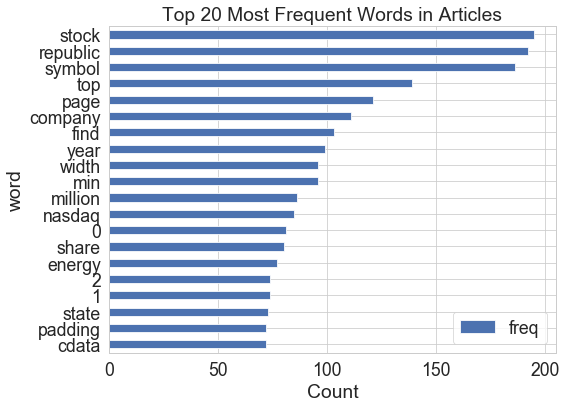

In [20]:
oxy_wc[:20][::-1].plot(kind='barh', figsize=(8,6))
plt.xlabel('Count')
plt.title('Top 20 Most Frequent Words in Articles');

In [21]:
# define a function to generate wordcloud from text
def plot_wordcloud(data,title,c='Greens'):
    
    wordcloud = WordCloud(
        background_color='lightgray',
        colormap=c,
        stopwords=en_stopwords,
        max_words=500,
        max_font_size=50,
        random_state=123 
    ).generate(data)

    fig = plt.figure(figsize=(20, 10))#plt.figure(1, figsize=(15, 13))
    plt.axis('off')
    plt.title(title,size=28,y=1.02)
    plt.imshow(wordcloud)
    plt.show()

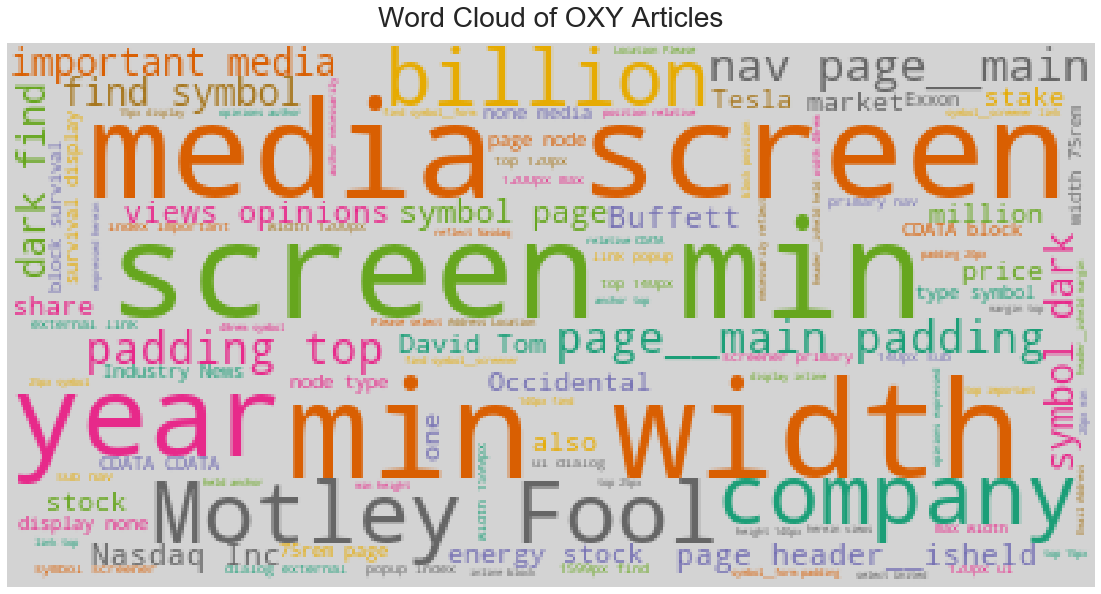

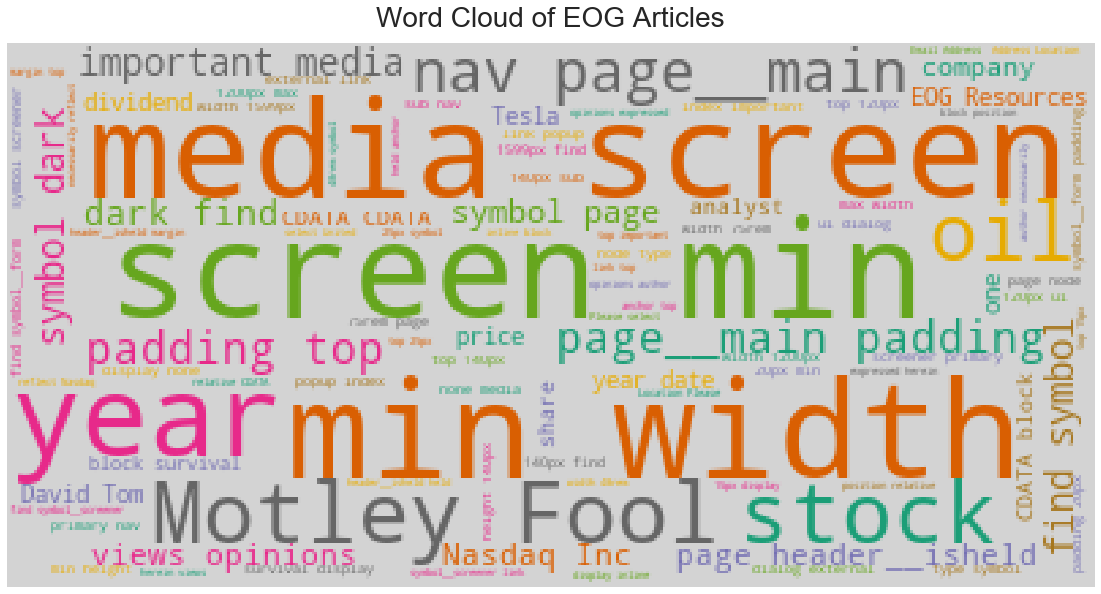

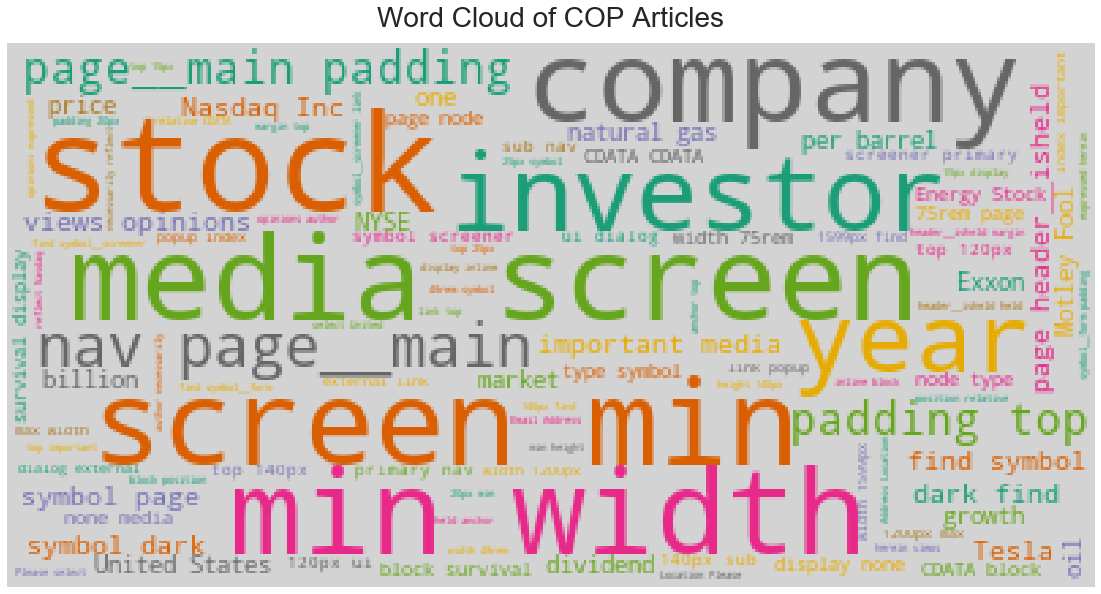

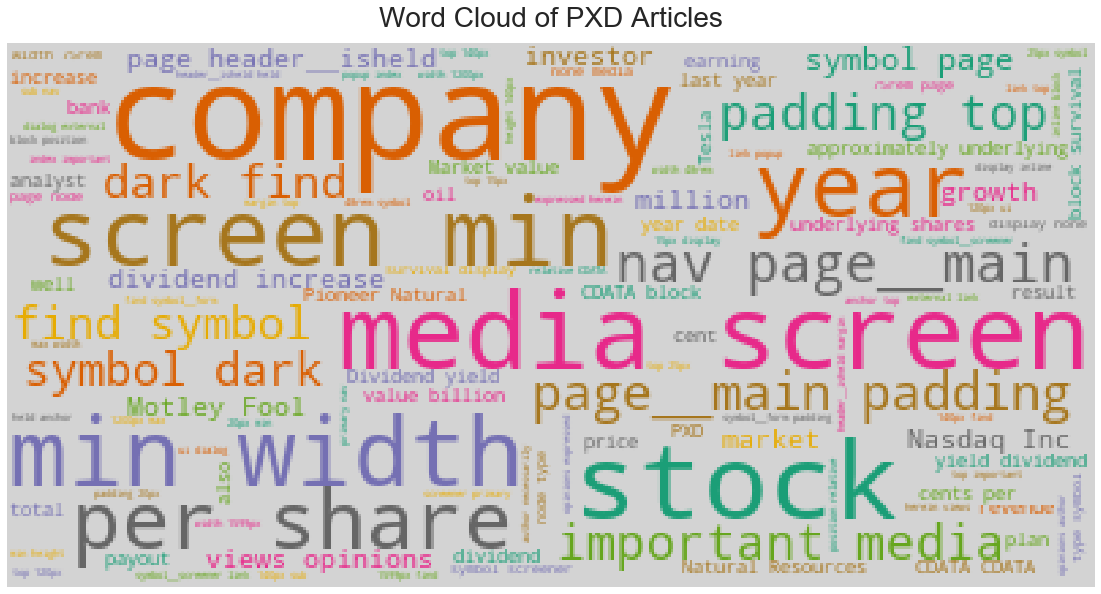

In [22]:
for ticker in tickers:
    texts=' '.join(all_articles[ticker])
    plot_wordcloud(texts,'Word Cloud of {} Articles'.format(ticker),'Dark2_r')
